In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [10]:
cxr_meta = pd.read_csv('./physionet.org/files/mimic-cxr-jpg/2.0.0/files/mimic-cxr-2.0.0-metadata.csv')

In [11]:
cxr_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377110 entries, 0 to 377109
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   dicom_id                                    377110 non-null  object 
 1   subject_id                                  377110 non-null  int64  
 2   study_id                                    377110 non-null  int64  
 3   PerformedProcedureStepDescription           341598 non-null  object 
 4   ViewPosition                                361341 non-null  object 
 5   Rows                                        377110 non-null  int64  
 6   Columns                                     377110 non-null  int64  
 7   StudyDate                                   377110 non-null  int64  
 8   StudyTime                                   377110 non-null  float64
 9   ProcedureCodeSequence_CodeMeaning           377110 non-null  object 
 

In [12]:
g1 = cxr_meta.groupby('subject_id')
g1.size()

subject_id
10000032     7
10000764     3
10000898     5
10000935    10
10000980    16
            ..
19999287     9
19999376     1
19999442     2
19999733     3
19999987     3
Length: 65379, dtype: int64

In [13]:
cxr_meta = cxr_meta[cxr_meta['subject_id'] < 16000000]
cxr_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226718 entries, 0 to 226717
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   dicom_id                                    226718 non-null  object 
 1   subject_id                                  226718 non-null  int64  
 2   study_id                                    226718 non-null  int64  
 3   PerformedProcedureStepDescription           205111 non-null  object 
 4   ViewPosition                                217275 non-null  object 
 5   Rows                                        226718 non-null  int64  
 6   Columns                                     226718 non-null  int64  
 7   StudyDate                                   226718 non-null  int64  
 8   StudyTime                                   226718 non-null  float64
 9   ProcedureCodeSequence_CodeMeaning           226718 non-null  object 
 10  V

In [14]:
g2 = cxr_meta.groupby('subject_id')
g2.size()

subject_id
10000032     7
10000764     3
10000898     5
10000935    10
10000980    16
            ..
15999159     3
15999356     6
15999409     6
15999575     8
15999702     4
Length: 39139, dtype: int64

In [19]:
chf_meta = pd.read_csv('./pulmonary-edema-severity-grades-based-on-mimic-cxr-1.0.1/pulmonary-edema-severity-grades-based-on-mimic-cxr-1.0.1/auxiliary_metadata/mimic_cxr_metadata_available_CHF_view.csv')
chf_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377097 entries, 0 to 377096
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dicom_id          377097 non-null  object
 1   study_id          377097 non-null  int64 
 2   subject_id        377097 non-null  int64 
 3   gender            377097 non-null  object
 4   report_available  377097 non-null  bool  
 5   dicom_available   377097 non-null  bool  
 6   CHF               377097 non-null  bool  
 7   view              377097 non-null  object
dtypes: bool(3), int64(2), object(3)
memory usage: 15.5+ MB


In [20]:
cxr_meta = pd.merge(cxr_meta, chf_meta, on=['dicom_id', 'study_id', 'subject_id'], how='inner')
cxr_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226693 entries, 0 to 226692
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dicom_id          226693 non-null  object
 1   subject_id        226693 non-null  int64 
 2   study_id          226693 non-null  int64 
 3   CHF_x             226693 non-null  bool  
 4   gender            226693 non-null  object
 5   report_available  226693 non-null  bool  
 6   dicom_available   226693 non-null  bool  
 7   CHF_y             226693 non-null  bool  
 8   view              226693 non-null  object
dtypes: bool(4), int64(2), object(3)
memory usage: 9.5+ MB


In [21]:
cxr_meta = cxr_meta[(cxr_meta['report_available'] == True) & (cxr_meta['dicom_available'] == True) & (cxr_meta['view'] == 'frontal')]
cxr_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148927 entries, 0 to 226692
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   dicom_id          148927 non-null  object
 1   subject_id        148927 non-null  int64 
 2   study_id          148927 non-null  int64 
 3   CHF_x             148927 non-null  bool  
 4   gender            148927 non-null  object
 5   report_available  148927 non-null  bool  
 6   dicom_available   148927 non-null  bool  
 7   CHF_y             148927 non-null  bool  
 8   view              148927 non-null  object
dtypes: bool(4), int64(2), object(3)
memory usage: 7.4+ MB


In [23]:
cxr_meta = cxr_meta[['dicom_id', 'subject_id', 'study_id', 'CHF_X']]
cxr_meta.info()

KeyError: "['CHF_X'] not in index"

In [18]:
doby_meta = pd.read_csv('./doby_demo_metadata.csv')
doby_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7137 entries, 0 to 7136
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subject_id      7137 non-null   int64 
 1   study_id        7137 non-null   int64 
 2   dicom_id        7137 non-null   object
 3   DicomPath       7137 non-null   object
 4   edema_severity  7137 non-null   int64 
 5   normal          7137 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 334.7+ KB


In [14]:
doby_meta = pd.merge(doby_meta, cxr_meta, on=['subject_id', 'study_id', 'dicom_id'], how='inner')
doby_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7064 entries, 0 to 7063
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subject_id      7064 non-null   int64 
 1   study_id        7064 non-null   int64 
 2   dicom_id        7064 non-null   object
 3   DicomPath       7064 non-null   object
 4   edema_severity  7064 non-null   int64 
 5   normal          7064 non-null   int64 
 6   CHF             7064 non-null   bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 393.2+ KB


In [20]:
(doby_meta['CHF'] == False).sum()

0

In [22]:
doby_meta.to_csv('./doby_meta.csv', index=False)

In [23]:
meta = pd.read_csv('./doby_meta.csv')
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7064 entries, 0 to 7063
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subject_id      7064 non-null   int64 
 1   study_id        7064 non-null   int64 
 2   dicom_id        7064 non-null   object
 3   DicomPath       7064 non-null   object
 4   edema_severity  7064 non-null   int64 
 5   normal          7064 non-null   int64 
 6   CHF             7064 non-null   bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 338.1+ KB


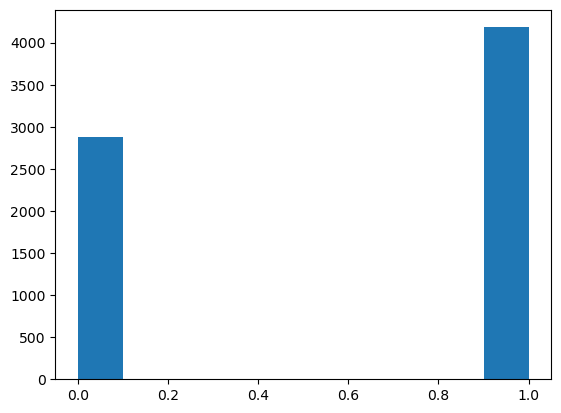

In [24]:
plt.hist(meta['normal'])
plt.show()

In [29]:
print(((meta['normal'] == 1).sum() / (meta['normal'] == 0).sum()))

1.4519264144394308
